# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('exch_rates.csv')
df['Frequency'] = pd.to_datetime(df['Frequency'])
df.set_index('Frequency', inplace=True)
df.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot the three exchange rates in one plot

Text(0.5, 0, 'Year')

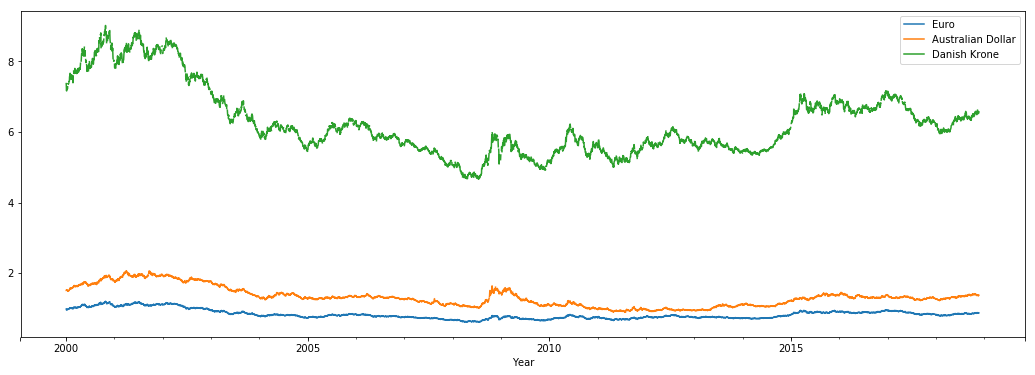

In [6]:
df.plot(figsize=(18,6))
plt.xlabel('Year')

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between roughly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [7]:
df.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The exchange rate for the Australian dollar and the Euro are highly correlated. The Danish Krone and the Euro are almost perfectly 
correlated. Research shows that the Danish krone is closely pegged to the Euro, so this high correlation makes sense.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

In [9]:
df_diff = df.diff(periods=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017CFF8F24A8>,
      dtype=object)

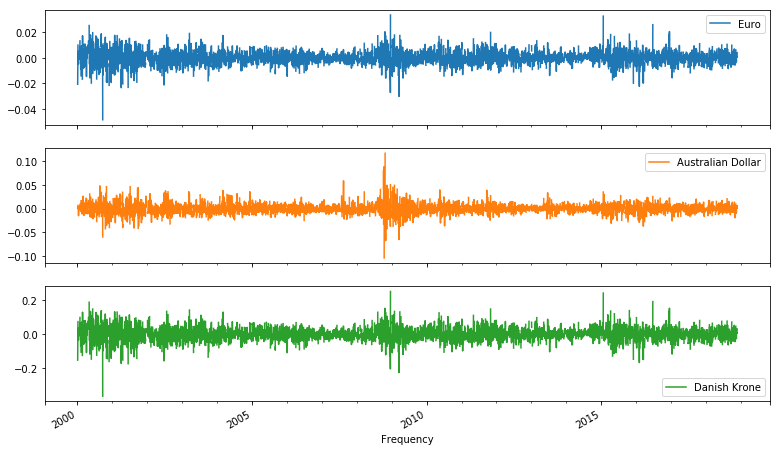

In [10]:
df_diff.plot(subplots=True, figsize=(13,8), legend=True)

In [11]:
df_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

The correlation between the Australian dollar and the Euro went down from 0.83 to 0.54 but the correlation between the Danish
krone and the Euro is still very high.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [13]:
eur = df[['Euro']]

In [14]:
eur_shift_1 = eur.shift(periods=1)
eur_shift_1.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,0.991080
2000-01-05,0.970403


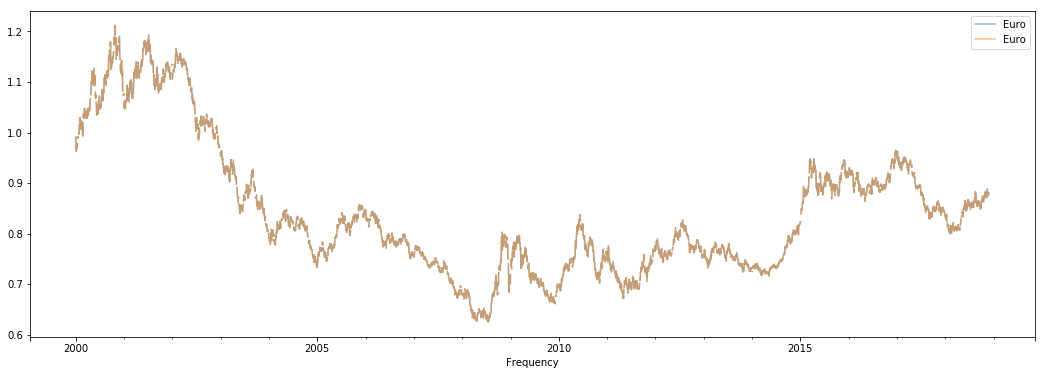

In [15]:
lag_1 = pd.concat([eur_shift_1, eur], axis=1)
lag_1.plot(figsize=(18,6), alpha = 0.5)

In [22]:
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this, but for a "lag 5 autocorrelation"

In [20]:
eur_shift_50 = eur.shift(periods=50)
eur_shift_50.head()

,Euro
Frequency,
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN


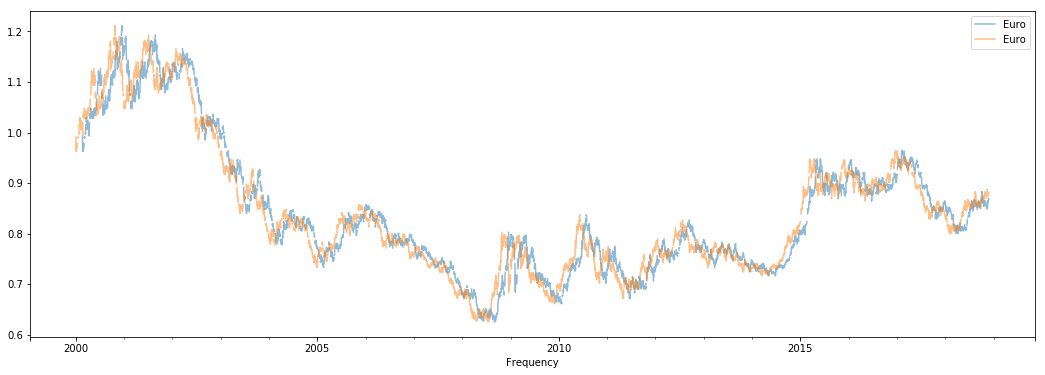

In [21]:
lag_50 = pd.concat([eur_shift_50, eur], axis=1)
lag_50.plot(figsize=(18, 6), alpha= 0.5)

In [23]:
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

Even having a high period for the shift, the correlation is still very high.

Knowing this, let's plot the ACF now.

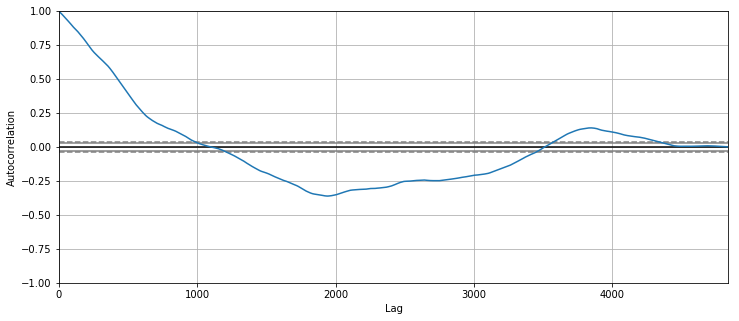

In [24]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna());

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

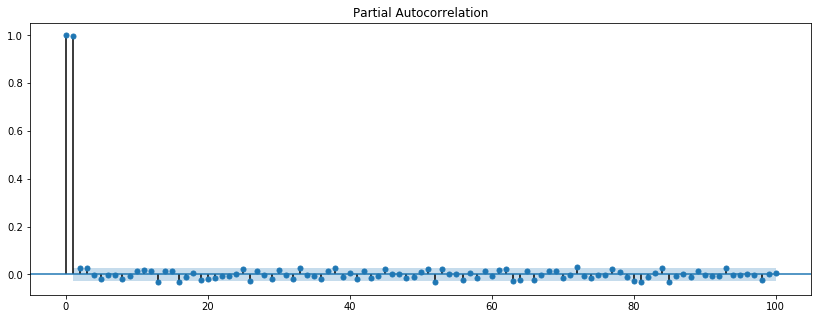

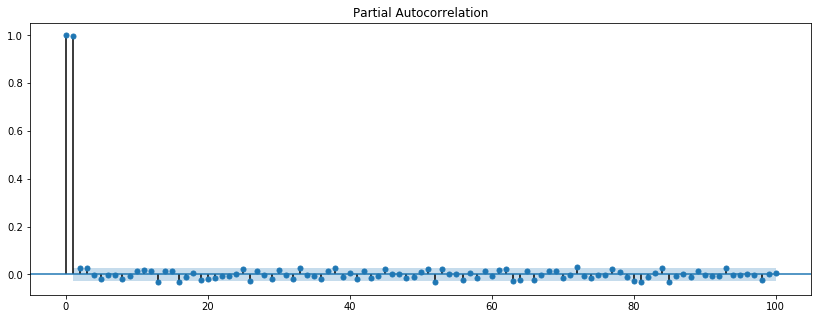

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5
plot_pacf(eur.dropna(), lags = 100, method = 'ywm')

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [28]:
passenger = pd.read_csv('passengers.csv')
passenger['Month'] = pd.to_datetime(passenger['Month'])
passenger.set_index('Month', inplace = True)
passenger.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 0, 'Year')

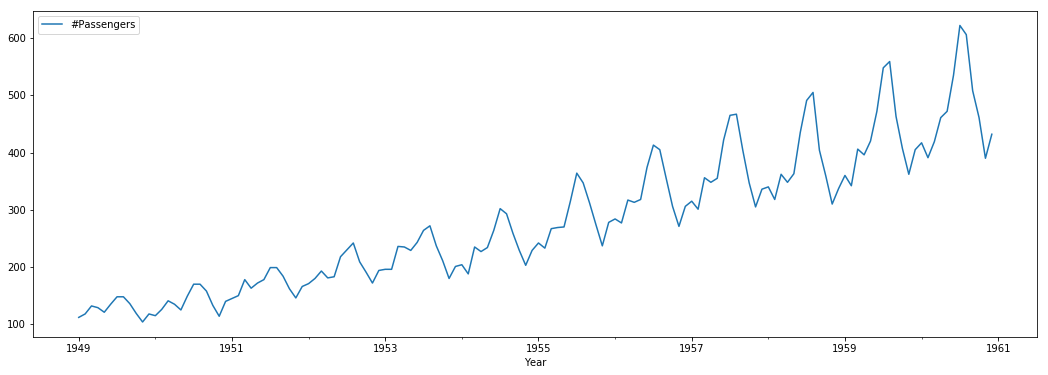

In [29]:
passenger.plot(figsize=(18,6))
plt.xlabel('Year')

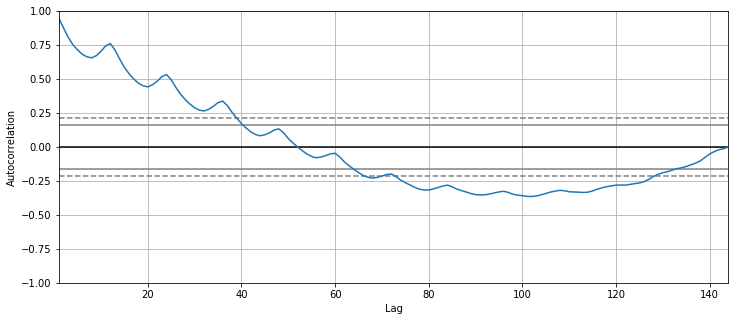

In [30]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(passenger);

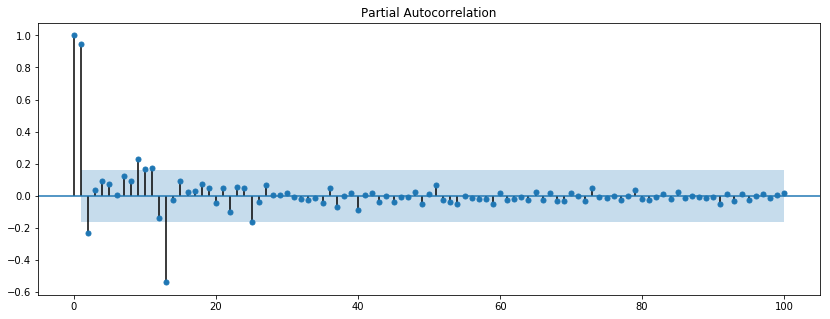

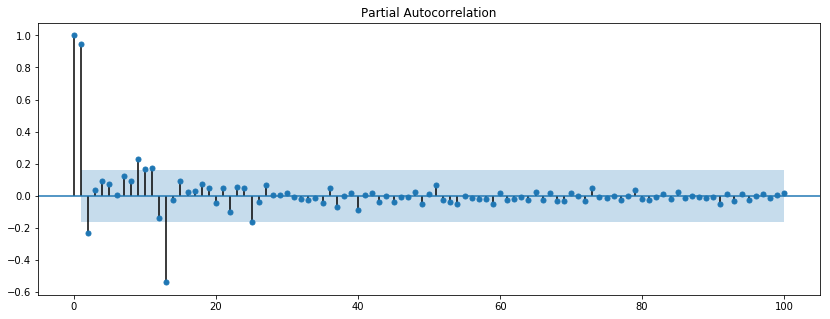

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5
plot_pacf(passenger.dropna(), lags = 100, method = 'ywm')

In [32]:
passenger_diff = passenger.diff(periods=1)

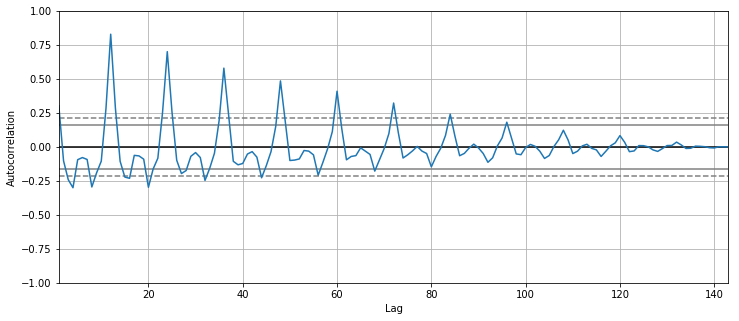

In [34]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(passenger_diff.dropna());

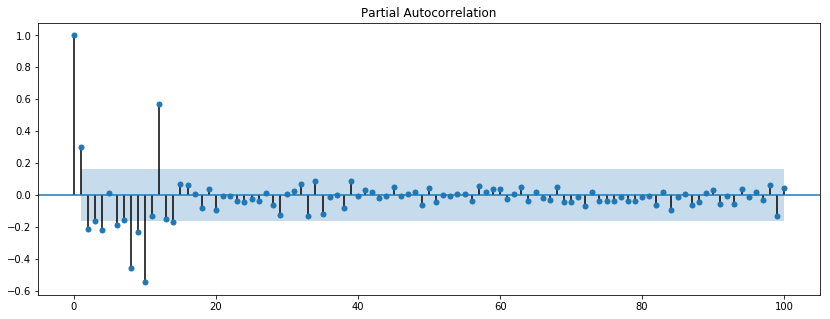

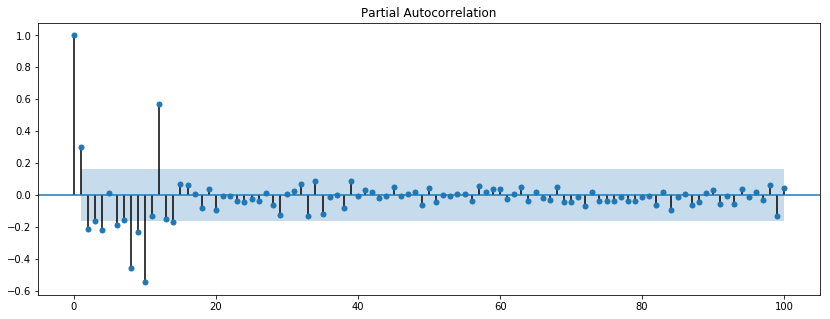

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5
plot_pacf(passenger_diff.dropna(), lags = 100, method = 'ywm')

### Your conclusion here

There seems to be large peaks showing as seasonality like the Google trends data set. The PACF shows one high correlation
which is right at the 12 month mark.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [37]:
nyse = pd.read_csv("NYSE_monthly.csv")
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


Text(0.5, 0, 'Year')

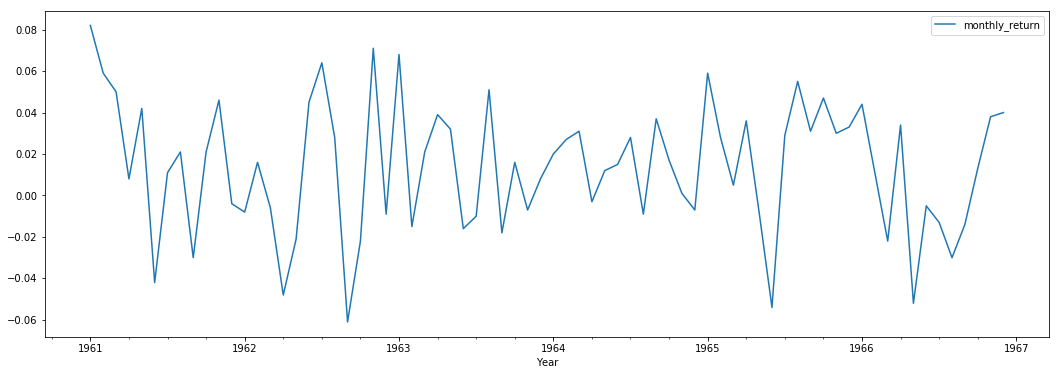

In [39]:
nyse.plot(figsize=(18,6))
plt.xlabel('Year')

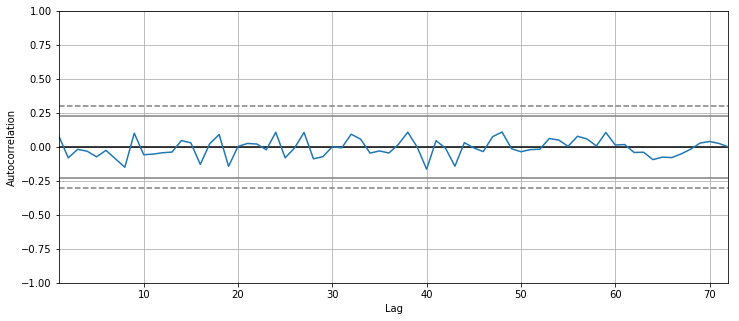

In [40]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nyse);

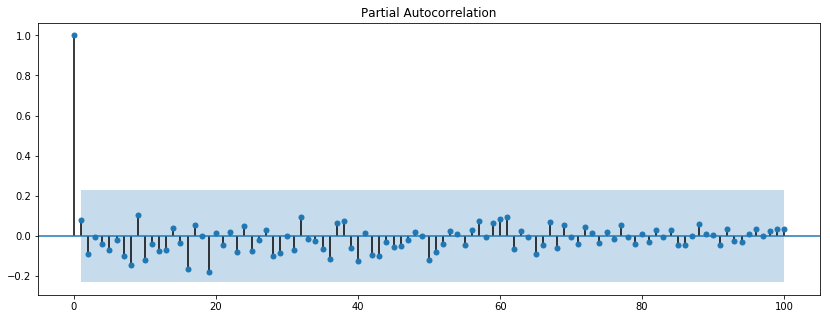

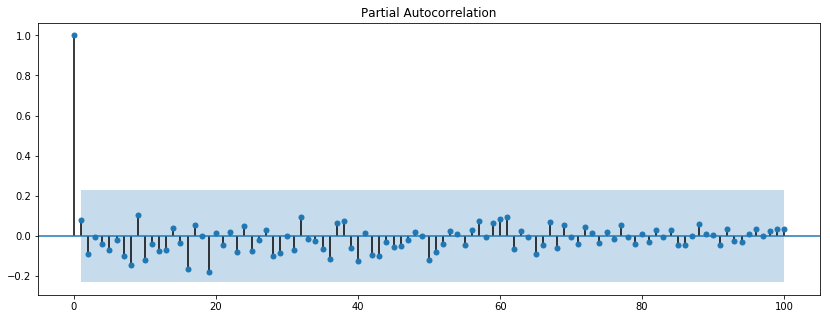

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5
plot_pacf(nyse.dropna(), lags = 100, method = 'ywm')

## Your conclusion here

Autocorrelations and partial autocorrelations are close to zero for any lag which makes sense because this dataset is a white
noise model. Meaning there is no trend or seasonality.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!